In [ ]:
# In this code, we will attempt to run MNIST backwards, i.e. given a number, the neural net will output the image of that number.

In [2]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network


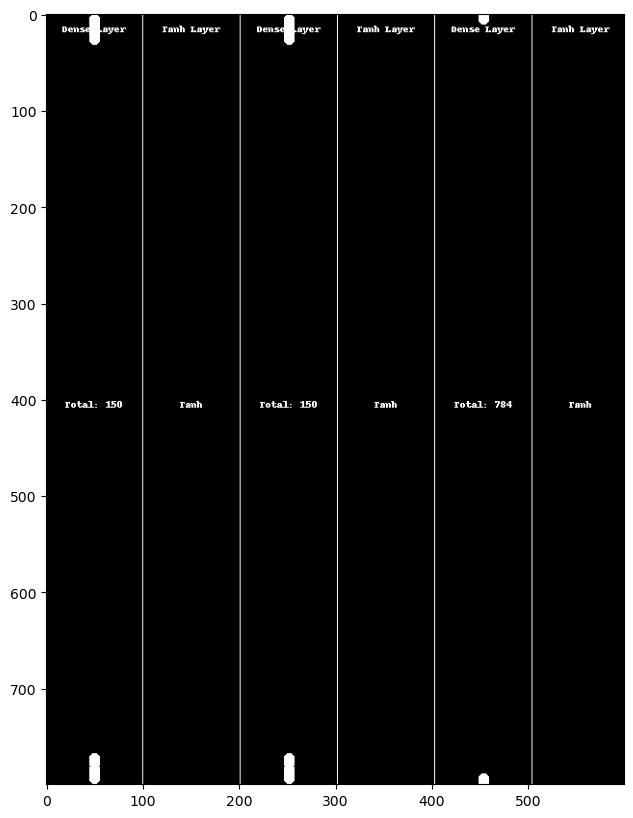

In [22]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 60000)
x_test, y_test = preprocess_data(x_test, y_test, 10000)

# neural network
network = [
    Dense(1, 40),
    Tanh(),
    Dense(40, 28*28),
    Tanh()
]
network_image = visualize_network(network)

#Show the network big picture
plt.figure(figsize=(10,10))
plt.imshow(network_image) #Q. how to make the picture bigger? A. use plt.figure(figsize=(20,20))


In [23]:
# train
costs = train(network, mse, mse_prime, y_train, x_train, epochs=5, batch_size = 1, learning_rate=0.01)


1/5, error=0.20534274555504
2/5, error=0.07548049274314354
3/5, error=0.07402647539250311
4/5, error=0.07216354283195871
5/5, error=0.07172185121822633


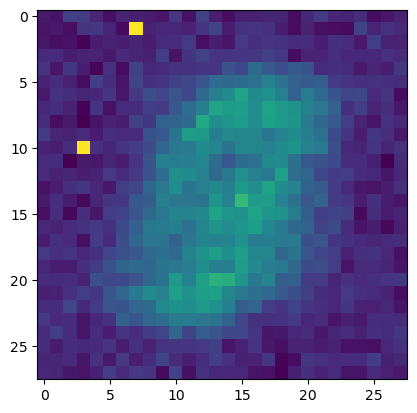

In [43]:
# Visualize each digit, feeding the network with the number and visualizing the output
y = 1

x = predict(network, y)
plt.imshow(x.reshape(28,28))
plt.show()

